# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [22]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]


### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`
In basic sense linear regression can be thought of finding relationship between two things i.e. Dependent variable (y) and independent variable (X) using a straight line.
 we need to find linear relationship, hence we have connected them with a line. It is well known that equation for a line is y = mX + c, which can also be written as Y=β0+β1X1.
 If this equation of line is completed, Y can be predicted for future x. Here from past few data, X and y are known. The aim is to find values of β0 and β1 to complete our equation.
 There can be various best fit lines, but Linear regression models try to make line such that the vertical distance between the line and the data points (that is, the residuals) is as small as possible. This is called “fitting the line to the data” and will be our ‘best fit line’.

In [10]:
x_test1 = pd.DataFrame(x_test)
x_train1 = pd.DataFrame(x_train)
y_test1 = pd.DataFrame(y_test)
y_train1 = pd.DataFrame(y_train)
print("Shape of x_train:",x_train1.shape)
print("Shape of y_train:",y_train1.shape)
print("Shape of x_test:",x_test1.shape)
print("Shape of y_test:",y_test1.shape)


ones  = np.ones((x_train1.shape[0],1))
x_train1 = np.hstack((ones,x_train1))

ones  = np.ones((x_test1.shape[0],1))
x_test1  = np.hstack((ones,x_test1))

print("after adding 1 at 0th index :")

print("Shape of x_train:",x_train1.shape)
print("Shape of y_train:",y_train1.shape)
print("Shape of x_test:",x_test1.shape)
print("Shape of y_test:",y_test1.shape)


Shape of x_train: (240, 25)
Shape of y_train: (240, 1)
Shape of x_test: (60, 25)
Shape of y_test: (60, 1)
after adding 1 at 0th index :
Shape of x_train: (240, 26)
Shape of y_train: (240, 1)
Shape of x_test: (60, 26)
Shape of y_test: (60, 1)


In [11]:
# 1.3.1.2
# implement Linear Regression
 
    
def Regression_model(x_train,y_train,alpha,iteration):
    m = y_train.size
    # print(x_train.shape)
    # print(y_train.shape)        
    theta = np.zeros((x_train.shape[1],1))
    cost_list = []
    for i in range (iteration):
        y_pred = np.dot(x_train,theta)
        ##cost function
        cost = (1/(2*m))*np.sum(np.square(y_pred - y_train))
        
        ##gradient descent
        d_theta = (1/m)*np.dot(x_train.T,y_pred - y_train)
        
        theta = theta - d_theta * alpha
        
        cost_list.append(cost)
        
        # if(i%(iteration/10) == 0):
        #     print("Cost is :",cost)
        
    return theta , cost_list


In [12]:
x_test1 = pd.DataFrame(x_test1)
x_train1 = pd.DataFrame(x_train1)

In [13]:
# 1.3.2.3
# try with different learning rates and choose the best one
# 1.3.2.3
# try with different learning rates and choose the best one
learning_rate = [0.001,0.0001, 0.005, 0.0005, 0.00005, 0.000005]
theta_vals =[]
cost_lists =[]
MSE = 99999.0
alpha_learing_rate = 0.005
for alpha in learning_rate:
    iteration = 5000
    theta , cost_list = Regression_model(x_train1,y_train1,alpha,iteration )
    theta_vals.append(theta)
    cost_lists.append(cost_list)
    y_pred = np.dot(x_test1,theta)
    ms = sqrt(mean_squared_error(y_test1, y_pred))
    print("At alpha",alpha,"MSE is:",ms)
   
    if MSE > ms:
        MSE = ms
        alpha_learing_rate = alpha
    
print("best learning rate" , alpha_learing_rate," with MSE IS:", MSE)   
    

At alpha 0.001 MSE is: 1.833169236341714
At alpha 0.0001 MSE is: 4.579239303265535
At alpha 0.005 MSE is: 0.15893161916006202
At alpha 0.0005 MSE is: 2.95242484003415
At alpha 5e-05 MSE is: 4.832512034172778
At alpha 5e-06 MSE is: 5.061686328633731
best learning rate 0.005  with MSE IS: 0.15893161916006202


In [14]:
##now apply at best learning rate
theta , cost_list = Regression_model(x_train1,y_train1,alpha_learing_rate,iteration )
y_pred = np.dot(x_test1,theta)
y_pred[:5]

array([[-4.00389166],
       [-4.21730505],
       [-4.22070852],
       [-4.22875089],
       [-4.23558605]])

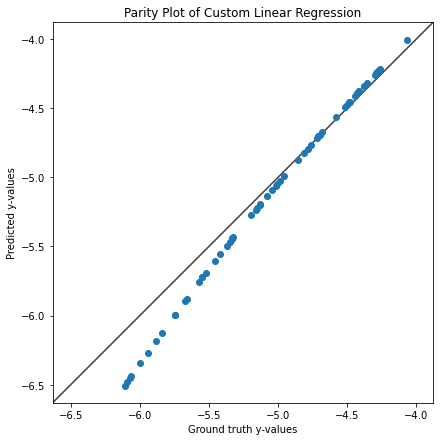

In [15]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test1, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.
The cost function for ridge regression:

Min(||Y – X(theta)||^2 + λ||theta||^2)

Lambda is the penalty term. λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penalty term. The higher the values of alpha, the bigger is the penalty and therefore the magnitude of coefficients is reduced.

In [16]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge , Lasso
from sklearn.metrics import mean_squared_error




# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
learning_rate = [0.001,0.0001, 0.005, 0.0005, 0.00005, 0.000005]
RMSE = []
MSE = 99999.0
best_alpha = 0.005
for alpha in learning_rate:
    rd = Ridge(alpha = alpha)
    rd.fit(x_train,y_train)
    rd.score(x_test,y_test)
    y_pred = rd.predict(x_test)
    ms = sqrt(mean_squared_error(y_test, y_pred))
    print("At alpha",alpha,"RMSE is:",ms)

    if MSE > ms:
        MSE = ms
        best_alpha = alpha
    RMSE.append(ms)

learning_rate = pd.DataFrame(learning_rate, columns = ["alpha"])
RMSE = pd.DataFrame(RMSE, columns = ["RMSE"])

# ##Table
df_all_cols = pd.concat([learning_rate, RMSE], axis = 1)
df_all_cols

At alpha 0.001 RMSE is: 0.07406137817163512
At alpha 0.0001 RMSE is: 0.1461433202130837
At alpha 0.005 RMSE is: 0.28008158063004995
At alpha 0.0005 RMSE is: 0.03573414266369858
At alpha 5e-05 RMSE is: 0.13925464345988897
At alpha 5e-06 RMSE is: 0.010656300857802625


,alpha,RMSE
0,0.001000,0.074061
1,0.000100,0.146143
2,0.005000,0.280082
3,0.000500,0.035734
4,0.000050,0.139255
5,0.000005,0.010656


Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation.


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`
Regularization is designed to penalize model complexity, therefore the higher the alpha, the less complex the model, decreasing the error due to variance (overfit). Alphas that are too high on the other hand increase the error due to bias (underfit). It is important, therefore to choose an optimal alpha such that the error is minimized in both directions.

The AlphaSelection Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models. Generally speaking, alpha increases the affect of regularization, e.g. if alpha is zero there is no regularization and the higher the alpha, the more the regularization parameter influences the final model.

So, now computation is decreased, somehow.

In [17]:
rd = Ridge(alpha = best_alpha)
rd.fit(x_train,y_train)
y_pred = rd.predict(x_test)
rd.score(x_test,y_test)

0.9996595384967797

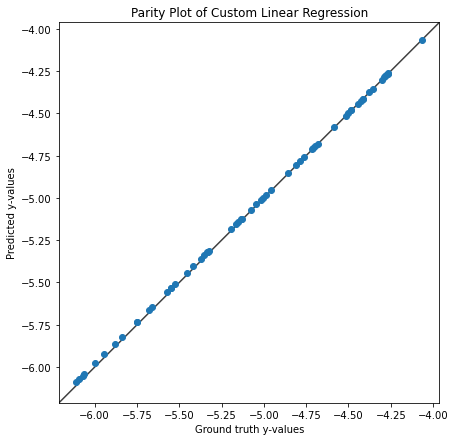

In [18]:
# 1.3.2.4
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`                            
Lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. 
It allows feature selection also by neglecting non- necessary features


In [19]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
learning_rate = [0.01,0.0001, 0.005, 0.0005, 0.00005, 0.000005]
RMSE = []
MSE = 99999.0
best_alpha = 0.005
for alpha in learning_rate:
    ls = Lasso(alpha = alpha)
    ls.fit(x_train,y_train)
    ls.score(x_test,y_test)
    y_pred = ls.predict(x_test)
    ms = sqrt(mean_squared_error(y_test, y_pred))
    print("At alpha",alpha,"RMSE is:",ms)

    if MSE > ms:
        MSE = ms
        best_alpha = alpha
    RMSE.append(ms)

learning_rate = pd.DataFrame(learning_rate, columns = ["alpha"])
RMSE = pd.DataFrame(RMSE, columns = ["RMSE"])

# ##Table
df_all_cols = pd.concat([learning_rate, RMSE], axis = 1)
df_all_cols

At alpha 0.01 RMSE is: 0.042419962550167355
At alpha 0.0001 RMSE is: 0.6124899982744757
At alpha 0.005 RMSE is: 0.41062093231156366
At alpha 0.0005 RMSE is: 0.2685450847293934
At alpha 5e-05 RMSE is: 0.6388579472705369
At alpha 5e-06 RMSE is: 0.4085127799393423


,alpha,RMSE
0,0.010000,0.042420
1,0.000100,0.612490
2,0.005000,0.410621
3,0.000500,0.268545
4,0.000050,0.638858
5,0.000005,0.408513


In [20]:
ls = Lasso(alpha = .01)
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
ls.score(x_test,y_test)

0.9946049480974413

<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`
    y^ = w[0]*x[0] + w[1]*x[1] + ..... + w[m]*x[n] + b ---eq1

In this shrinkage technique, the coefficients determined in the linear model from equation eq1. above are shrunk towards the central point as the mean by introducing a penalization factor called the alpha α (or sometimes lamda) values.

Due to the fact that coefficients will be shrunk towards a mean of zero, less important features in a dataset are eliminated when penalized. The shrinkage of these coefficients based on the alpha value provided leads to some form of automatic feature selection, as input variables are removed in an effective approach.

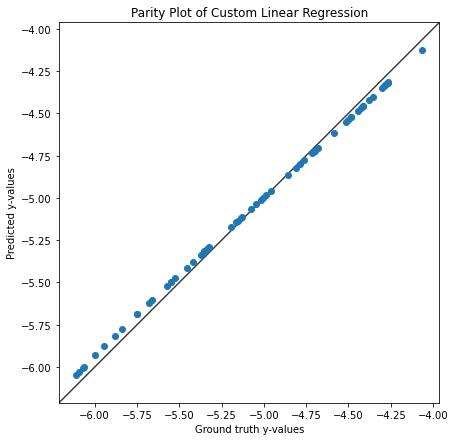

In [21]:
# 1.3.3.4
# 1.3.2.4
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()